In [1]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
df=pd.read_csv("petrol_consumption[1].csv")

In [5]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [6]:
df.shape

(48, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [8]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [9]:
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

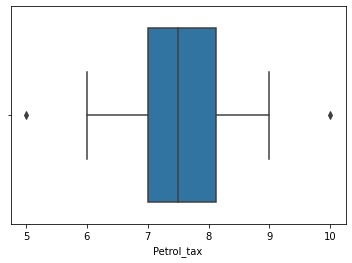

In [107]:
sns.boxplot(df['Petrol_tax'])

In [13]:
df['Average_income'].skew()

0.10410198754872736

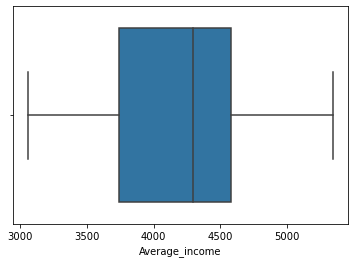

In [14]:
sns.boxplot(df['Average_income'])

In [15]:
df['Average_income'].skew()

0.10410198754872736

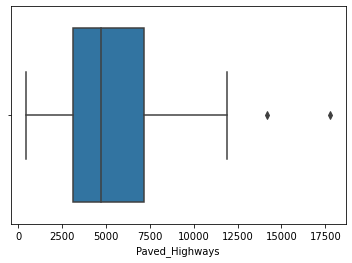

In [16]:
sns.boxplot(df['Paved_Highways'])

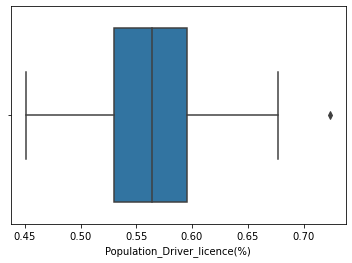

In [17]:
sns.boxplot(df['Population_Driver_licence(%)'])

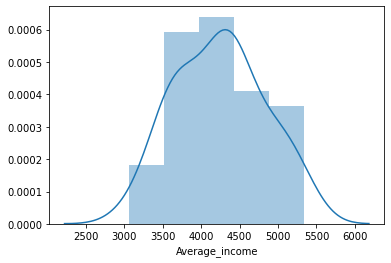

In [18]:
sns.distplot(df['Average_income'])

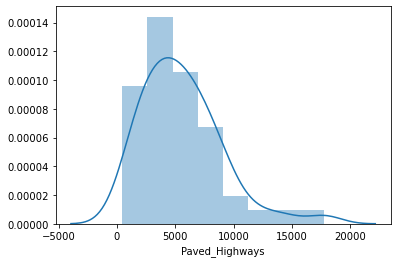

In [19]:
sns.distplot(df['Paved_Highways'])

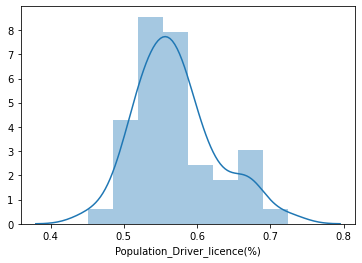

In [12]:
sns.distplot(df['Population_Driver_licence(%)'])

In [39]:
q1=df['Petrol_tax'].quantile(0.25)
q1

q3=df['Petrol_tax'].quantile(0.75)
q3


IQR=q3-q1

IQR

ll=q1-1.5*IQR

ll

ul=q3+1.5*IQR

ul

df.shape

df1=df[~((df['Petrol_tax']<ll)|(df['Petrol_tax']>ul))]

In [40]:
df1.shape

(46, 5)

In [41]:
df1=df[((df['Petrol_tax']<ll)|(df['Petrol_tax']>ul))]

In [43]:
df1

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
5,10.0,5342,1333,0.571,457
36,5.0,4045,17782,0.566,640


In [46]:
q1=df['Paved_Highways'].quantile(0.25)
q1

q3=df['Paved_Highways'].quantile(0.75)
q3


IQR=q3-q1

IQR

ll=q1-1.5*IQR

ll

ul=q3+1.5*IQR

ul

df.shape

df1=df[~((df['Paved_Highways']<ll)|(df['Paved_Highways']>ul))]

In [47]:
df.shape

(48, 5)

In [48]:
df1.shape

(46, 5)

In [54]:
q1=df['Population_Driver_licence(%)'].quantile(0.25)
q1

q3=df['Population_Driver_licence(%)'].quantile(0.75)
q3


IQR=q3-q1

IQR

ll=q1-1.5*IQR

ll

ul=q3+1.5*IQR

ul

df.shape

df1=df[~((df['Population_Driver_licence(%)']<ll)|(df['Population_Driver_licence(%)']>ul))]

In [55]:
df.shape

(48, 5)

In [56]:
df1.shape

(47, 5)

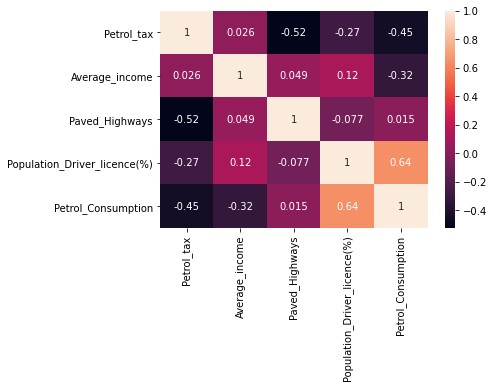

In [57]:
sns.heatmap(df1.corr(),annot=True)

In [58]:
X=df1[['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)',]]

In [61]:
y=df1['Petrol_Consumption']

In [62]:
from sklearn.model_selection import train_test_split

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [67]:
model=LinearRegression()

In [68]:
lr=model.fit(X_train,y_train)

In [71]:
lr.score(X_train,y_train)

0.6460305380663043

In [72]:
pred=lr.predict(X_test)

In [73]:
pred

array([599.52809241, 501.95896894, 553.38736252, 411.17332087,
       710.36278395, 530.24727016, 653.16231861, 554.96914863,
       422.80526766, 526.14101612])

In [86]:
y_test

27    631
7     467
4     410
11    471
38    648
25    566
42    632
28    574
22    464
34    487
Name: Petrol_Consumption, dtype: int64

In [90]:
live_data=pd.DataFrame({'Petrol_tax':[12,45,65],'Average_income':[3456,6543,2435],'Paved_Highways':[6788,5647,8765],'Population_Driver_licence(%)':[0.7,0.6,0.8,]})

In [91]:
live_data

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,12,3456,6788,0.7
1,45,6543,5647,0.6
2,65,2435,8765,0.8


In [92]:
pred1=lr.predict(live_data)
pred1

array([  595.03376526, -1144.78369504, -1490.07640349])

In [94]:
df12=pd.DataFrame({"predicted_consumption":pred1})

In [95]:
df12

,predicted_consumption
0,595.033765
1,-1144.783695
2,-1490.076403


In [97]:
pd.concat([live_data,df12],axis=1)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),predicted_consumption
0,12,3456,6788,0.7,595.033765
1,45,6543,5647,0.6,-1144.783695
2,65,2435,8765,0.8,-1490.076403


In [98]:
from sklearn.metrics import mean_squared_error

In [99]:
from sklearn.metrics import mean_absolute_error

In [100]:
MSE=mean_squared_error(y_test,pred)

In [101]:
MAE=mean_absolute_error(y_test,pred)

In [102]:
lr.score(X_train,y_train)

0.6460305380663043

In [103]:
lr.score(X_test,y_test)

0.457673269590788

In [105]:
lr.score(live_data,pred1)

1.0